In [18]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

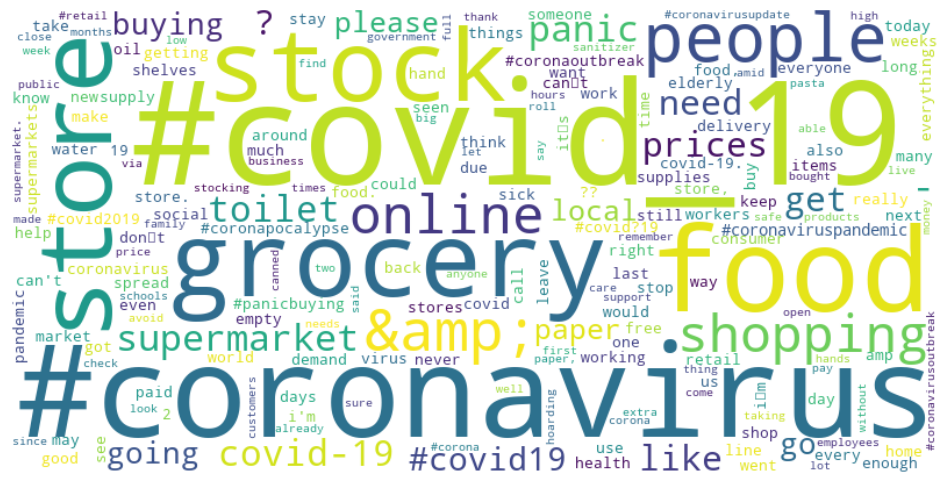

In [22]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Users/user/Documents/PDS/assignment3/Raw data/Corona_NLP_test.csv")

# Clean the text data
data['clean_tweet'] = data['OriginalTweet'].apply(lambda x: re.sub(r'http\S+', '', x)) # remove URLs
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # remove special characters and punctuation marks


data.to_csv('C:/Users/user/Documents/PDS/assignment3/Clean data/Clean_data.csv', index=False)

# part 1:Convert text to lowercase
data['OriginalTweet'] = data['OriginalTweet'].str.lower()


#Tokenize the text
data['tokens'] = data['OriginalTweet'].apply(lambda x: x.split())

# part 2:Remove stop words
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# part3:Count word frequencies
word_freq = Counter()
data['tokens'].apply(lambda x: word_freq.update(x))

# part 4:Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

